SVM - Classification Report (Entraînement):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.90      0.95      0.92        37
           2       0.94      0.89      0.92        37

    accuracy                           0.94       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.94      0.94      0.94       105

SVM - Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Arbre de décision - Classification Report (Entraînement):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00  

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Réseau de neurones - Classification Report (Entraînement):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.94      0.84      0.89        37
           2       0.85      0.95      0.90        37

    accuracy                           0.92       105
   macro avg       0.93      0.93      0.93       105
weighted avg       0.93      0.92      0.92       105

Réseau de neurones - Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



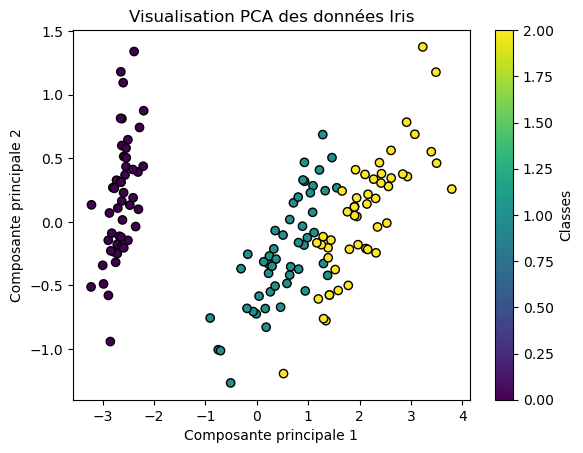

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

# Chargement des données Iris
data = datasets.load_iris()
X_data, target = data.data, data.target

# Normalisation des données avec MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X_data)

# Séparation des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.3, random_state=42)

# Modèle SVM
svm_model = SVC(C=1.0, kernel='linear')
svm_model.fit(X_train, y_train)
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

# Affichage des résultats SVM
print("SVM - Classification Report (Entraînement):")
print(classification_report(y_train, y_train_pred_svm))
print("SVM - Classification Report (Test):")
print(classification_report(y_test, y_test_pred_svm))

# Modèle Arbre de décision
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_train_pred_tree = tree_model.predict(X_train)
y_test_pred_tree = tree_model.predict(X_test)

# Affichage des résultats Arbre de décision
print("Arbre de décision - Classification Report (Entraînement):")
print(classification_report(y_train, y_train_pred_tree))
print("Arbre de décision - Classification Report (Test):")
print(classification_report(y_test, y_test_pred_tree))

# Modèle Réseau de neurones
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)
y_train_pred_nn = nn_model.predict(X_train)
y_test_pred_nn = nn_model.predict(X_test)

# Affichage des résultats Réseau de neurones
print("Réseau de neurones - Classification Report (Entraînement):")
print(classification_report(y_train, y_train_pred_nn))
print("Réseau de neurones - Classification Report (Test):")
print(classification_report(y_test, y_test_pred_nn))

# Visualisation des données avec PCA
acp = PCA(n_components=2)
X_reduit = acp.fit_transform(X_data)

# Visualisation des données réduites avec couleurs selon les classes
plt.scatter(X_reduit[:, 0], X_reduit[:, 1], c=target, cmap='viridis', edgecolors='k')
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Visualisation PCA des données Iris")
plt.colorbar(label="Classes")
plt.show()
